# Урок 7. Классификация с помощью kNN. Кластеризация K-means

## Домашнее задание<a class='anchor' id='hw'>

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.
2. *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

Загрузим один из "игрушечных" датасетов из sklearn.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

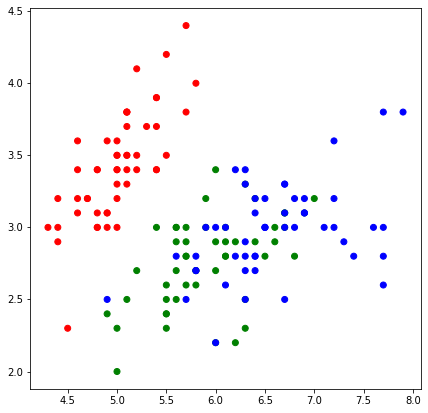

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [6]:
def calc_weight_distance(dists):
    eps = 1e-10
    return 1 / dists - eps

In [7]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += calc_weight_distance(d[0])

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Напишем функцию для вычисления точности

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [9]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.700


C:\Users\fitz1\AppData\Local\Temp\ipykernel_5268\3308565034.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / dists - eps


Построим график распределения классов.

In [10]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


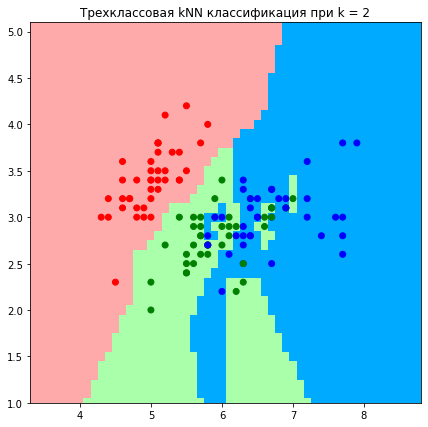

CPU times: total: 1.61 s
Wall time: 1.6 s


In [11]:
%%time
get_graph(X_train, y_train, k)

In [12]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.700


C:\Users\fitz1\AppData\Local\Temp\ipykernel_5268\3308565034.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / dists - eps


(2352, 2)


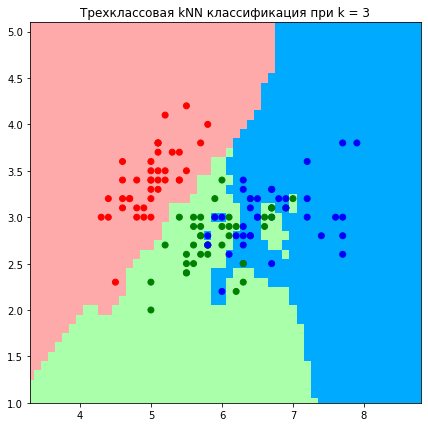

CPU times: total: 1.61 s
Wall time: 1.6 s


In [13]:
%%time
get_graph(X_train, y_train, k)

In [14]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.700


C:\Users\fitz1\AppData\Local\Temp\ipykernel_5268\3308565034.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / dists - eps


(2352, 2)


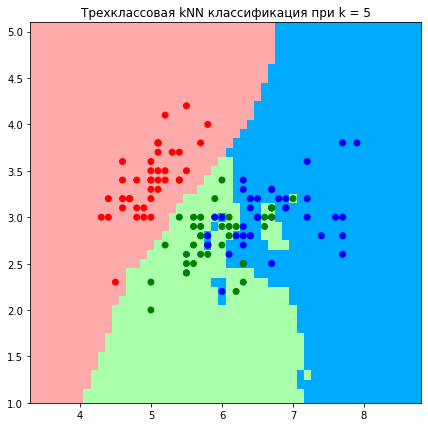

CPU times: total: 1.61 s
Wall time: 1.6 s


In [15]:
%%time
get_graph(X_train, y_train, k)

In [16]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.700


C:\Users\fitz1\AppData\Local\Temp\ipykernel_5268\3308565034.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / dists - eps


(2352, 2)


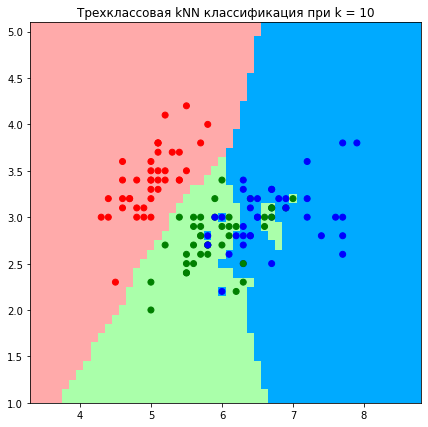

CPU times: total: 1.62 s
Wall time: 1.63 s


In [17]:
%%time
get_graph(X_train, y_train, k)

## Обучение без учителя. Кластеризация. K-means<a class='anchor' id='unsupervised'>

## Внутренние метрики <a class='anchor' id='in'>

- Внутрикластерное расстояние (также называется компактностью кластеров, cluster cohesion): $$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho(x_{i}, c_{k}),$$ где $K$ - количество кластеров, $c_{k}$ - центр кластера. Этот функционал нужно минимизировать, так как в идеальном случае все объекты в одном кластере одинаковы, и расстояние между ними равно нулю.


- Межкластерное расстояние (отделимость кластеров, cluster separation): $$\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho(x_{i}, x_{j}).$$ Этот функционал наоборот нужно максимизировать, так как объекты из разных кластеров должны максимально различаться, то есть иметь максимальное расстояние между собой.


In [18]:
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(n_samples=100, random_state=1)
# X, y = make_moons(n_samples=50, noise=0.02, random_state=1)

Изобразим точки на графике.

In [19]:
import matplotlib.pyplot as plt
import numpy as np


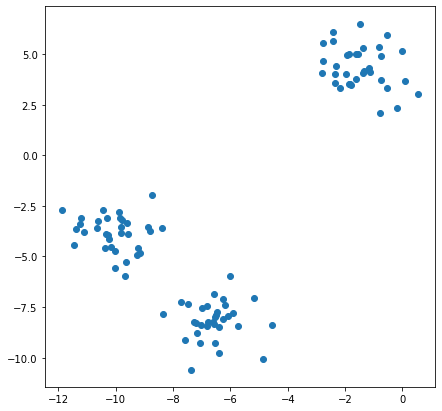

In [20]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [21]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [22]:
def get_intracluster_distance(clusters, centroids):
    distance = 0
    for i in range(len(centroids)):
        distance += np.sum(np.square(clusters[i] - centroids[i]))
    distance /= len(centroids)
    return distance
        

In [23]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для кластеризации
        clusters = {i: [] for i in range(k)}
        
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break

    cluster_distance_metric = get_intracluster_distance(clusters, centroids)
    return old_centroids, clusters, cluster_distance_metric

In [24]:
def visualize(centroids, clusters, metric):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
    print(f'metric: {metric:.3f}')      
    plt.show()

In [25]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4


In [26]:
%%time
metrics = {'Количество кластеров' : [], 'Среднее квадратичное внутрикластерное расстояние' : []}
for k in range(1, 11):
    centroids, clusters, metric = kmeans(X, k, max_iterations, min_distance)
    metrics['Количество кластеров'].append(k)
    metrics['Среднее квадратичное внутрикластерное расстояние'].append(metric)

CPU times: total: 141 ms
Wall time: 141 ms


In [27]:
df_metrics = pd.DataFrame(data=metrics).set_index('Количество кластеров')
df_metrics

,Среднее квадратичное внутрикластерное расстояние
Количество кластеров,
1,4118.153778
2,330.784925
3,52.094298
4,34.843529
5,25.315076
6,19.302168
7,14.476723
8,12.251036
9,8.098633
